In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from functools import partial
import tensorflow.keras as keras
import tensorflow as tf

In [2]:
path = "D:/HAR\Human Action Recognition"
X = []
y_temp = pd.read_csv(path+"/Training_set.csv")
y=[]
for i in os.listdir(path+"/train"):
    temp = cv2.imread(path+"/train/"+i)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    temp = cv2.resize(temp, (64, 64))
    index = i.split("_")[1]
    index = int(index.split(".")[0])
    X.append(temp)
    y.append(y_temp.label[index-1])

listening_to_music


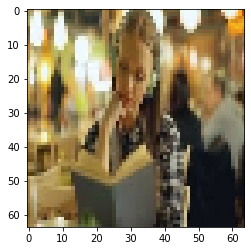

In [3]:
plt.imshow(X[40])
print(y[40])

In [4]:
X = np.array(X)
X = X/255.0

In [5]:
int_to_str = {0:'sitting', 1:'dancing', 2:'fighting',3: 'using_laptop', 4:'laughing',
       5:'listening_to_music',6: 'texting',7: 'eating',8: 'clapping',9: 'cycling',
       10:'drinking',11: 'sleeping',12: 'running',13: 'calling',14: 'hugging'}

str_to_int = {v:k for k,v in int_to_str.items()}

In [6]:
y = np.array(y)
# y = y.reshape(12600, 1)

In [7]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
# ohe = OneHotEncoder()
# ohe.fit_transform(temp_y)
# # y = y.toarray()

In [8]:
# y = np.array(y)
# for i in range(len(y)):
#     y[i] = str_to_int.get(y[i])

In [9]:
base_cnn = partial(keras.layers.Conv2D, filters = 32, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")

In [48]:
filters = 32
Input = keras.Input(shape=[64, 64, 3])
x = base_cnn(filters = filters)(Input)
x = keras.layers.BatchNormalization()(x)
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

filters *= 2
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

filters *= 2
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

filters *= 2
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

filters *= 2
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = base_cnn(filters = filters)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dropout(0.3)(x)
Output = keras.layers.Dense(15, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)

In [49]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
model.fit(X, y, validation_split=0.2, epochs=50)

Epoch 1/50
315/315 [==============================] - 34s 100ms/step - loss: 3.0534 - accuracy: 0.1745 - val_loss: 3.0211 - val_accuracy: 0.1456
Epoch 2/50
315/315 [==============================] - 30s 95ms/step - loss: 2.3110 - accuracy: 0.2675 - val_loss: 2.6201 - val_accuracy: 0.2540
Epoch 3/50
315/315 [==============================] - 30s 95ms/step - loss: 1.9791 - accuracy: 0.3550 - val_loss: 2.3404 - val_accuracy: 0.3091
Epoch 4/50
315/315 [==============================] - 30s 96ms/step - loss: 1.7884 - accuracy: 0.4170 - val_loss: 1.9868 - val_accuracy: 0.3885
Epoch 5/50
315/315 [==============================] - 31s 98ms/step - loss: 1.6033 - accuracy: 0.4774 - val_loss: 1.8595 - val_accuracy: 0.4357
Epoch 6/50
315/315 [==============================] - 31s 97ms/step - loss: 1.4237 - accuracy: 0.5399 - val_loss: 1.8868 - val_accuracy: 0.4317
Epoch 7/50
315/315 [==============================] - 31s 97ms/step - loss: 1.2530 - accuracy: 0.5909 - val_loss: 1.9296 - val_accuracy

KeyboardInterrupt: 